In [1]:
%matplotlib inline

from neuron import h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
import json
import os

In [2]:
DATA_PATH = 'cell_inference/resources/simulation_data'
TRIAL_PATH = os.path.join(DATA_PATH, '50s_Loc3_Ori2_Geo3_params')

LFP_PATH = os.path.join(TRIAL_PATH, 'lfp.npz')  # LFP and labels

labels = np.load(LFP_PATH)['y']
print(labels.shape)

(50, 8)


In [3]:
CONFIG_PATH = os.path.join(TRIAL_PATH, 'config.json')

with open(CONFIG_PATH, 'r') as f:
    config = json.load(f)

inference_list = config['Trial_Parameters']['inference_list']

In [4]:
df = pd.DataFrame(labels, columns = inference_list)
display(df)

,y,d,theta,h,phi,r_s,l_t,r_t
0,-609.328419,60.920484,-0.085365,0.239862,-0.406046,7.820826,737.259475,1.281253
1,-1209.354469,77.016501,-0.696685,-0.912441,-0.255419,11.011761,156.491394,1.271699
2,327.121136,163.525782,-0.054192,-0.560549,-3.075148,8.058415,296.579300,1.152525
3,-906.286303,141.725841,0.371347,-0.592343,2.025212,11.314597,57.040630,1.325395
4,-547.712516,90.399719,-0.096053,0.962347,-1.184698,7.283373,309.586278,0.779839
5,-165.516930,79.906507,-0.646936,-0.910900,-1.023321,8.907087,590.498990,1.486688
6,-979.433445,127.695576,-0.043404,-0.569363,-2.691705,9.009655,115.058734,0.795065
7,-789.799183,53.612153,0.274008,-0.937202,0.783055,11.881211,626.047964,1.570313
8,-71.867277,141.096088,0.070511,0.279071,1.750572,11.488637,353.124111,1.287246
9,-66.167206,189.524516,-0.149426,0.306341,0.069374,8.922259,645.815772,1.722984


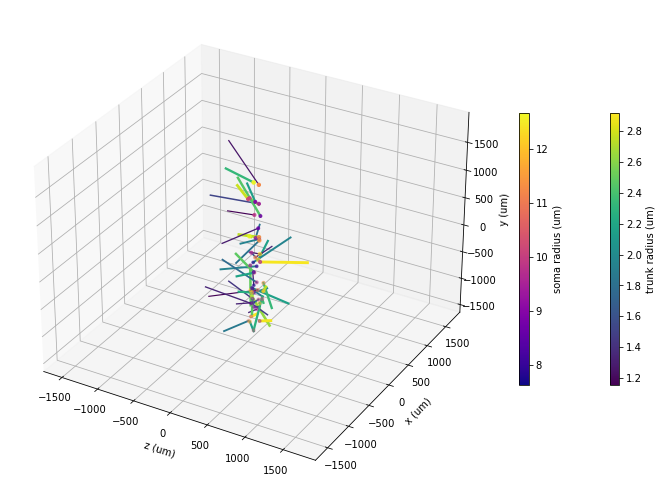

In [5]:
from cell_inference.utils.plotting.plot_all_cells import plot_all_cells

_ = plot_all_cells(df, figsize=(12,10)) # view='2D', view=(30,60)